code from: https://machinelearningmastery.com/arima-for-time-zill-forecasting-with-python/



In [1]:
import pandas as pd
import numpy as np
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

In [2]:
zill = pd.read_csv('https://mod4finalproject.s3.amazonaws.com/zillow_cleaned_no_nulls.csv', 
                   index_col=0, 
                   dtype = {'zip':'object'})

In [3]:
zill = zill.drop(columns = ['regionid', 'city', 'state', 'metro', 'countyname', 'sizerank'])

In [4]:
zill.index = pd.to_datetime(zill.index)

In [5]:
best_zips = ['33976', '33480', '01001']

In [ ]:
# zill = zill.resample('M', convention='start').sum()

# Model for all data

In [ ]:
# def parser(x):
#     return datetime.strptime('190'+x, '%Y-%m')
 
    model = ARIMA(np.asarray(zill.value.values), order=(10,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()`
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

# Model for zip 1

In [6]:
zip1 = zill.loc[(zill.zip == best_zips[0])]
zip1['2011':'2018']

,zip,value
date,,
2011-01-01,33976,59800.0
2011-02-01,33976,59800.0
2011-03-01,33976,59800.0
2011-04-01,33976,59800.0
2011-05-01,33976,59800.0
...,...,...
2017-12-01,33976,153900.0
2018-01-01,33976,154700.0
2018-02-01,33976,155400.0


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  264
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1673.548
Method:                       css-mle   S.D. of innovations            136.110
Date:                Wed, 06 May 2020   AIC                           3361.095
Time:                        16:02:51   BIC                           3386.127
Sample:                             1   HQIC                          3371.154
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        412.8370    275.749      1.497      0.134    -127.622     953.296
ar.L1.D.y      0.9300      0.157      5.920      0.000       0.622       1.238
ar.L2.D.y     -0.4066      0.184     -2.207      0.0

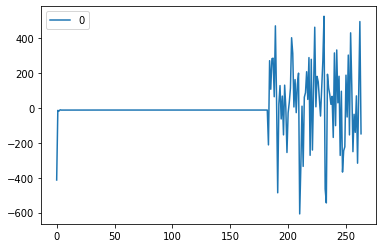

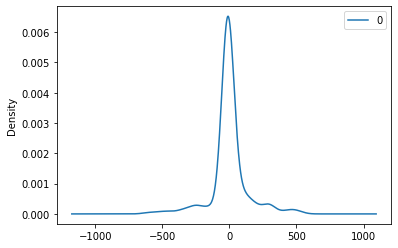

                0
count  264.000000
mean     1.122329
std    138.611690
min   -607.446731
25%    -11.301195
50%    -11.301195
75%    -11.301195
max    527.062666


In [10]:
# def parser(x):
#     return datetime.strptime('190'+x, '%Y-%m')
 
model = ARIMA(np.asarray(zip1.value.values), order=(3,1,2))
model_fit = model.fit()
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

# Rolling forecast ARIMA model 

In [ ]:
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

# def parser(x):
#     return datetime.strptime('190'+x, '%Y-%m')

X = zip1.value.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f, difference=%f' % (yhat, obs, yhat-obs))

error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()